In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/Tien/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 641 images belonging to 9 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/Tien/validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 95 images belonging to 9 classes.


In [ ]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [ ]:
val_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
21/21 [==============================] - 17s 796ms/step - loss: 2.2144 - accuracy: 0.1045 - val_loss: 2.1943 - val_accuracy: 0.1053
Epoch 2/100
21/21 [==============================] - 17s 788ms/step - loss: 2.1918 - accuracy: 0.1279 - val_loss: 2.1793 - val_accuracy: 0.1158
Epoch 3/100
21/21 [==============================] - 17s 786ms/step - loss: 2.1426 - accuracy: 0.1576 - val_loss: 2.1639 - val_accuracy: 0.1895
Epoch 4/100
21/21 [==============================] - 17s 779ms/step - loss: 2.0580 - accuracy: 0.2184 - val_loss: 2.1735 - val_accuracy: 0.1684
Epoch 5/100
21/21 [==============================] - 16s 779ms/step - loss: 2.0118 - accuracy: 0.1981 - val_loss: 2.2205 - val_accuracy: 0.1368
Epoch 6/100
21/21 [==============================] - 16s 779ms/step - loss: 1.9809 - accuracy: 0.2371 - val_loss: 2.2118 - val_accuracy: 0.1158
Epoch 7/100
21/21 [==============================] - 17s 811ms/step - loss: 1.9023 - accuracy: 0.2590 - val_loss: 2.1229 - val_accuracy:

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.09438073635101318
Train Accuracy 0.975039005279541


<function matplotlib.pyplot.show(*args, **kw)>

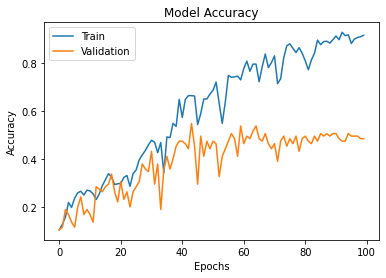

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Tien.h5")

In [ ]:
model_money=load_model('Tien.h5')

1/1 [==============================] - 0s 16ms/step
10K


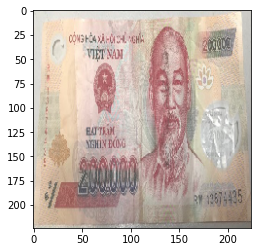

1/1 [==============================] - 0s 20ms/step
1K


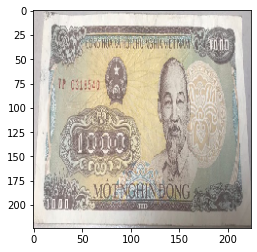

1/1 [==============================] - 0s 18ms/step
500K


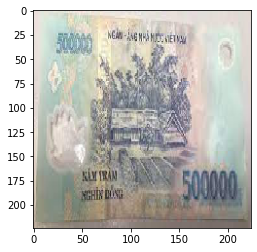

1/1 [==============================] - 0s 15ms/step
2K


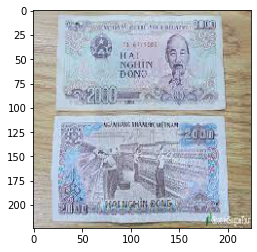

1/1 [==============================] - 0s 17ms/step
50K


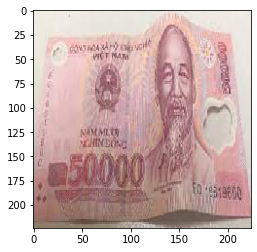

1/1 [==============================] - 0s 17ms/step
5K


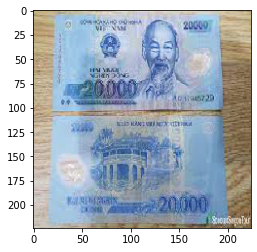

1/1 [==============================] - 0s 19ms/step
10K


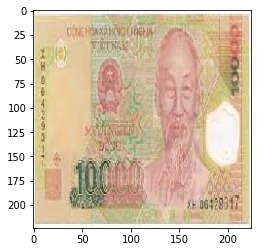

1/1 [==============================] - 0s 16ms/step
5K


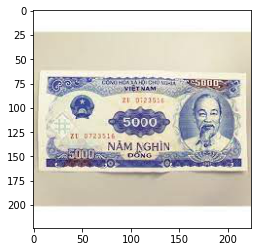

In [ ]:
import os
# Tạo bộ dữ liệu test
test = '/content/drive/My Drive/Le Khanh Lam/Tien/test/test1'
dict = list(training_set.class_indices.keys())

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_money.predict(img)

  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()